In [2]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from collections import OrderedDict
from datetime import datetime, timedelta

ff1.Cache.enable_cache('2023Miami') 
fp = ff1.get_session(2023, 'Miami', 'Q')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.3.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\fastf1\core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
c:\Users\ricca\OneDrive\Desktop

In [3]:
ff1.plotting.setup_mpl()

lec_lap = fp.laps.pick_driver('ALO').pick_fastest()
ver_lap = fp.laps.pick_driver('PER').pick_fastest()

lec_tel = lec_lap.get_car_data().add_distance()
ver_tel = ver_lap.get_car_data().add_distance()

lec_tel_to_0 = lec_tel.loc[(lec_tel['Speed'].between(70, 360, inclusive=True)) & (lec_tel['Distance'].between(3500, 4800, inclusive=True))]
ver_tel_to_0 = ver_tel.loc[(ver_tel['Speed'].between(70, 360, inclusive=True)) & (ver_tel['Distance'].between(3500, 4800, inclusive=True))]

fer_color = ff1.plotting.team_color('AMR')
rbr_color = ff1.plotting.team_color('RBR')

C:\Users\ricca\AppData\Local\Temp\ipykernel_4588\1828855653.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  lec_tel_to_0 = lec_tel.loc[(lec_tel['Speed'].between(70, 360, inclusive=True)) & (lec_tel['Distance'].between(3500, 4800, inclusive=True))]
C:\Users\ricca\AppData\Local\Temp\ipykernel_4588\1828855653.py:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  ver_tel_to_0 = ver_tel.loc[(ver_tel['Speed'].between(70, 360, inclusive=True)) & (ver_tel['Distance'].between(3500, 4800, inclusive=True))]


Text(0, 0.5, 'DRS')

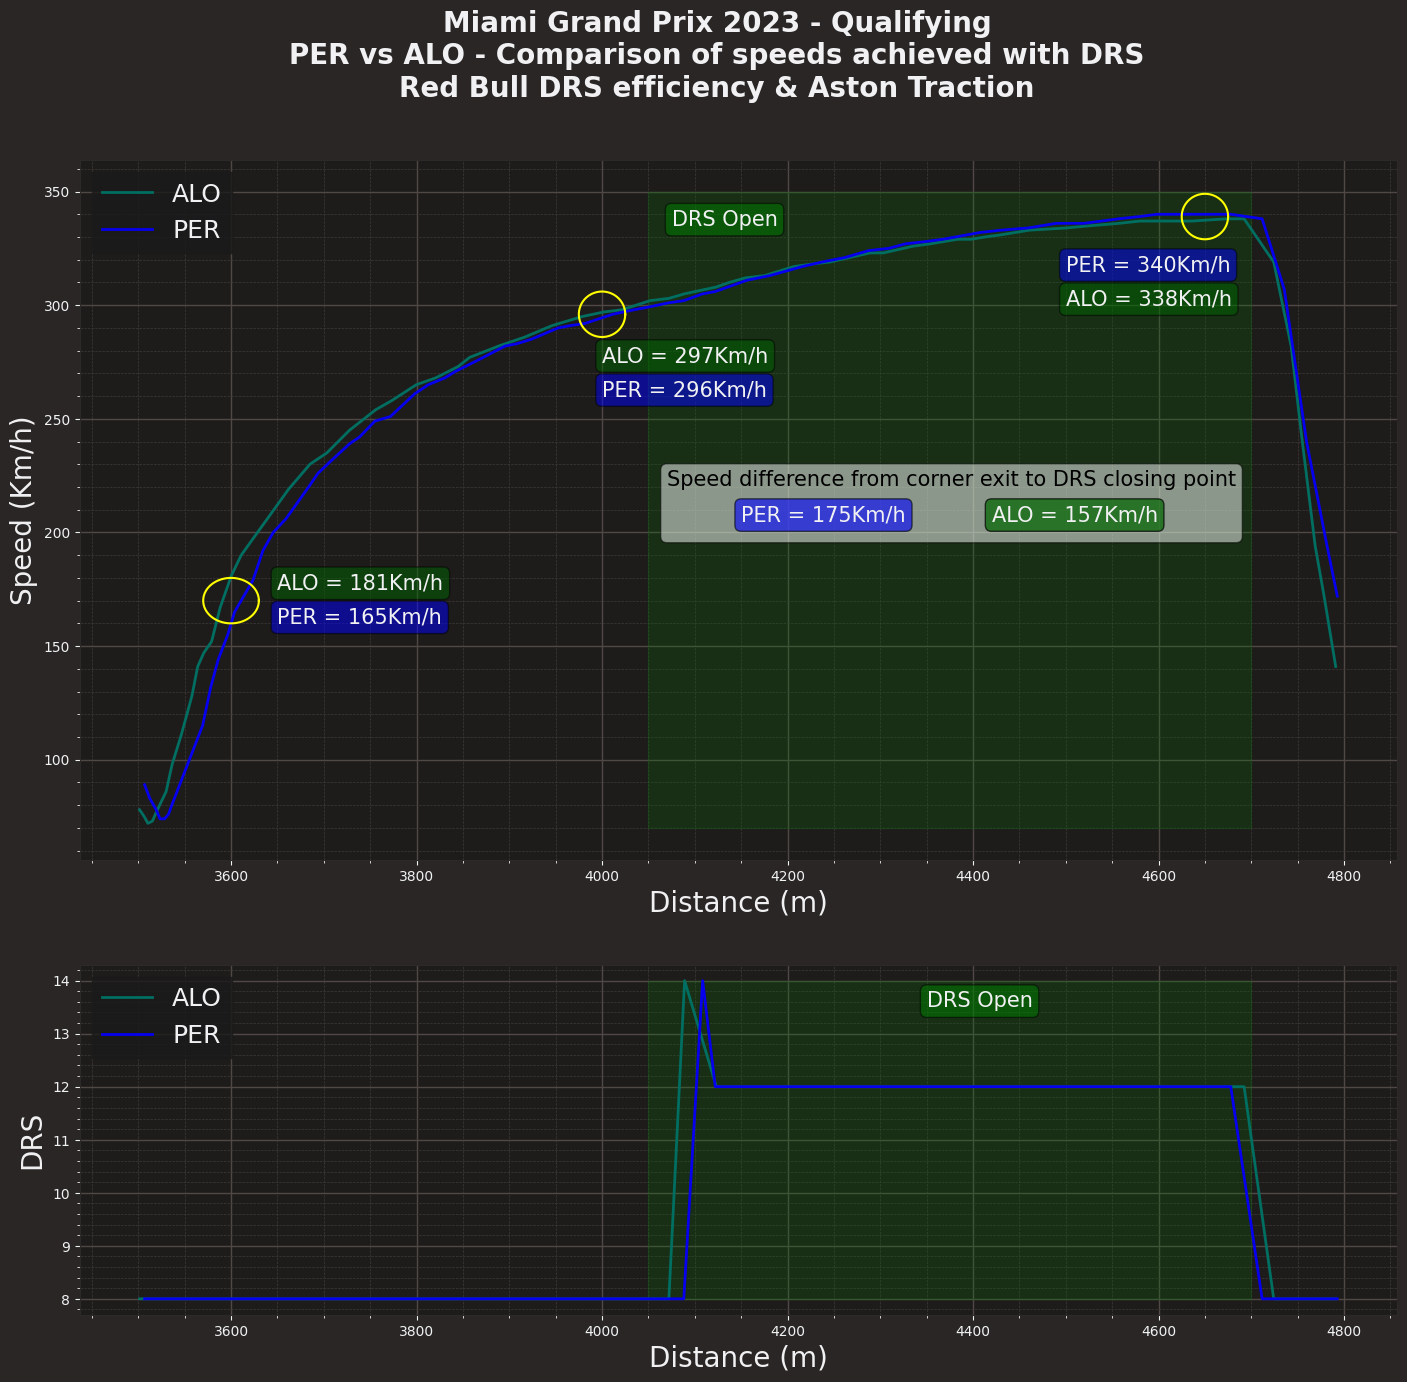

In [92]:
from matplotlib.patches import Rectangle
from math import pi
#lec = alo
lec_tel_nodrs = lec_tel.query('Distance >= 4000')['Speed'].iloc[0]
lec_tel_drs = lec_tel.query('Distance >= 4650')['Speed'].iloc[0]
lec_tel_out_turn = lec_tel.query('Distance >= 3600')['Speed'].iloc[0]
#ver = per
ver_tel_nodrs = ver_tel.query('Distance >= 4000')['Speed'].iloc[0]
ver_tel_drs = ver_tel.query('Distance >= 4650')['Speed'].iloc[0]
ver_tel_out_turn = ver_tel.query('Distance >= 3600')['Speed'].iloc[0]

lec_diff = lec_tel_drs-lec_tel_out_turn
ver_diff = ver_tel_drs-ver_tel_out_turn

plot_ratios = [2, 1]
fig, ax = plt.subplots(2, gridspec_kw={'height_ratios': plot_ratios})

fig.set_figheight(15)
fig.set_figwidth(17)
fig.suptitle(f"{fp.event['EventName']} {fp.event.year} - {fp.name}\nPER vs ALO - Comparison of speeds achieved with DRS\nRed Bull DRS efficiency & Aston Traction", fontsize=20, fontweight='bold')

#rettangolo verde e box DRS OPEN
ax[0].text(x=4075, y = 335, s = "DRS Open", fontsize=15, bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))
ax[0].add_patch(Rectangle((4050, 70), 650, 280, color='green', alpha=0.2))

#plot telemetria
ax[0].plot(lec_tel_to_0['Distance'], lec_tel_to_0['Speed'], color = fer_color, label = 'ALO', linewidth=2)
ax[0].plot(ver_tel_to_0['Distance'], ver_tel_to_0['Speed'], color = rbr_color, label = 'PER', linewidth=2)

#velocità in uscita curva
u=3600     #x-position of the center
v=170    #y-position of the center
a=30    #radius on the x-axis
b=10    #radius on the y-axis
t = np.linspace(0, 2*pi, 100)
ax[0].plot( u+a*np.cos(t) , v+b*np.sin(t), color="yellow")
ax[0].text(x=3650, y = 175, s = "ALO = " + str(lec_tel_out_turn) +"Km/h", fontsize=15, bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.5))
ax[0].text(x=3650, y = 160, s = "PER = " + str(ver_tel_out_turn) +"Km/h", fontsize=15, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.5))

#velocità prima del drs
u=4000     #x-position of the center
v=296    #y-position of the center
a=25    #radius on the x-axis
b=10    #radius on the y-axis
t = np.linspace(0, 2*pi, 100)
ax[0].plot( u+a*np.cos(t) , v+b*np.sin(t), color="yellow")
ax[0].text(x=4000, y = 275, s = "ALO = " + str(lec_tel_nodrs) +"Km/h", fontsize=15, bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.5))
ax[0].text(x=4000, y = 260, s = "PER = " + str(ver_tel_nodrs) +"Km/h", fontsize=15, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.5))
#velocità fine drs
#velocità prima del drs
u=4650     #x-position of the center
v=339    #y-position of the center
a=25    #radius on the x-axis
b=10    #radius on the y-axis
t = np.linspace(0, 2*pi, 100)
ax[0].plot( u+a*np.cos(t) , v+b*np.sin(t), color="yellow")
ax[0].text(x=4500, y = 300, s = "ALO = " + str(lec_tel_drs) +"Km/h", fontsize=15, bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.5))
ax[0].text(x=4500, y = 315, s = "PER = " + str(ver_tel_drs) +"Km/h", fontsize=15, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.5))

#propr assi e legenda
ax[0].set_xlabel('Distance (m)', fontsize=20)
ax[0].set_ylabel('Speed (Km/h)', fontsize=20)

ax[0].text(x=4070, y = 200, s = "Speed difference from corner exit to DRS closing point\n\n", color="black", fontsize=15, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
ax[0].text(x=4420, y = 205, s = "ALO = "+str(lec_diff)+"Km/h", fontsize=15, bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.7))
ax[0].text(x=4150, y = 205, s = "PER = "+str(ver_diff)+"Km/h", fontsize=15, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.6))

ax[0].legend(prop={'size':18}, loc='upper left')

#DRS
ax[1].add_patch(Rectangle((4050, 8), 650, 6, color='green', alpha=0.2))
ax[1].text(x=4350, y = 13.5, s = "DRS Open", fontsize=15, bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

ax[1].plot(lec_tel_to_0['Distance'], lec_tel_to_0['DRS'], color = fer_color, label = 'ALO', linewidth=2)

ax[1].plot(ver_tel_to_0['Distance'], ver_tel_to_0['DRS'], color = rbr_color, label = 'PER', linewidth=2)
ax[1].legend(prop={'size':18}, loc='upper left')
ax[1].set_xlabel('Distance (m)', fontsize=20)
ax[1].set_ylabel('DRS', fontsize=20)
# ax.add_patch(Rectangle((55, 80), 1, 52, color='red'))
